## IMPORT LIBRARY




In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report

## Import Data

In [61]:
data = pd.read_csv('Sensors_data.csv')

mendeskripsikan file menjadi "data" dan menhapus "Unnamed: 0"

In [62]:
data = data.drop(['Unnamed: 0', ], axis=1)
print (data)

                       _time  Heat_index   Humidity  Temperature
0       2022-04-13T21:38:00Z   26.389790  32.400000    26.800000
1       2022-04-13T21:39:00Z   26.391128  32.433333    26.800000
2       2022-04-13T21:40:00Z   26.377855  32.100000    26.800000
3       2022-04-13T21:41:00Z   26.401618  31.916667    26.850000
4       2022-04-13T21:42:00Z   26.414282  31.716667    26.883333
...                      ...         ...        ...          ...
385867  2023-01-20T01:12:00Z   20.359950  46.133333    21.000000
385868  2023-01-20T01:13:00Z   20.359080  46.100000    21.000000
385869  2023-01-20T01:14:00Z   20.363430  46.266667    21.000000
385870  2023-01-20T01:15:00Z   20.357340  46.033333    21.000000
385871  2023-01-20T01:16:00Z   20.357514  46.040000    21.000000

[385872 rows x 4 columns]


## Data Explore Analysis

Melihat info data

In [4]:
data.describe()

,Heat_index,Humidity,Temperature
count,385872.000000,385872.000000,385872.000000
mean,23.096529,52.172995,23.350587
std,2.657446,11.013673,2.558366
min,15.753450,17.983333,16.400000
25%,21.541057,45.350000,21.733333
50%,23.203913,53.183333,23.366667
75%,25.036140,59.200000,25.200000
max,30.089642,96.300000,29.933333


Mengecek jumlah data yang hilang



In [5]:
data.isnull().sum()/len(data)

_time          0.0
Heat_index     0.0
Humidity       0.0
Temperature    0.0
dtype: float64

Mengecek jumlah data yang valid

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385872 entries, 0 to 385871
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   _time        385872 non-null  object 
 1   Heat_index   385872 non-null  float64
 2   Humidity     385872 non-null  float64
 3   Temperature  385872 non-null  float64
dtypes: float64(3), object(1)
memory usage: 11.8+ MB


Mengubah variabel "_time" yang berupa object menjadi data tanggal dan waktu

In [7]:
# Ubah data "_time" menjadi datetime
data['_time'] = pd.to_datetime(data['_time'])
data.set_index('_time', inplace=True)

membuat plot data

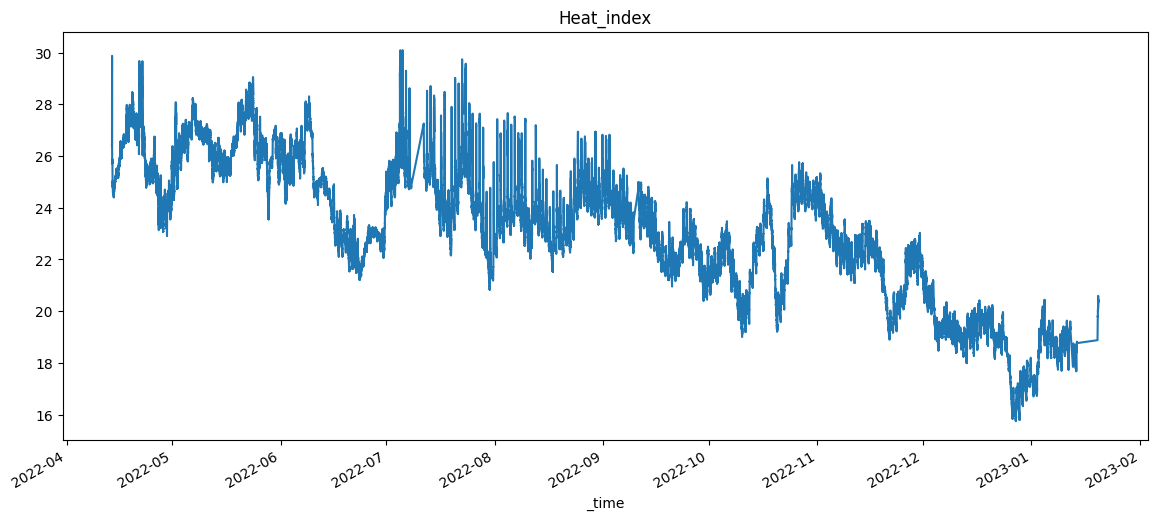

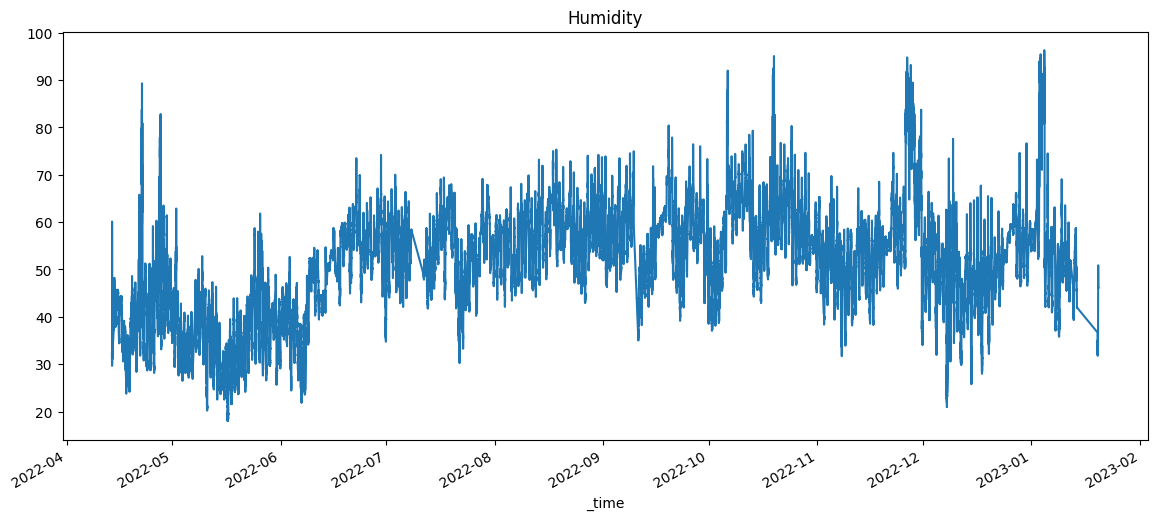

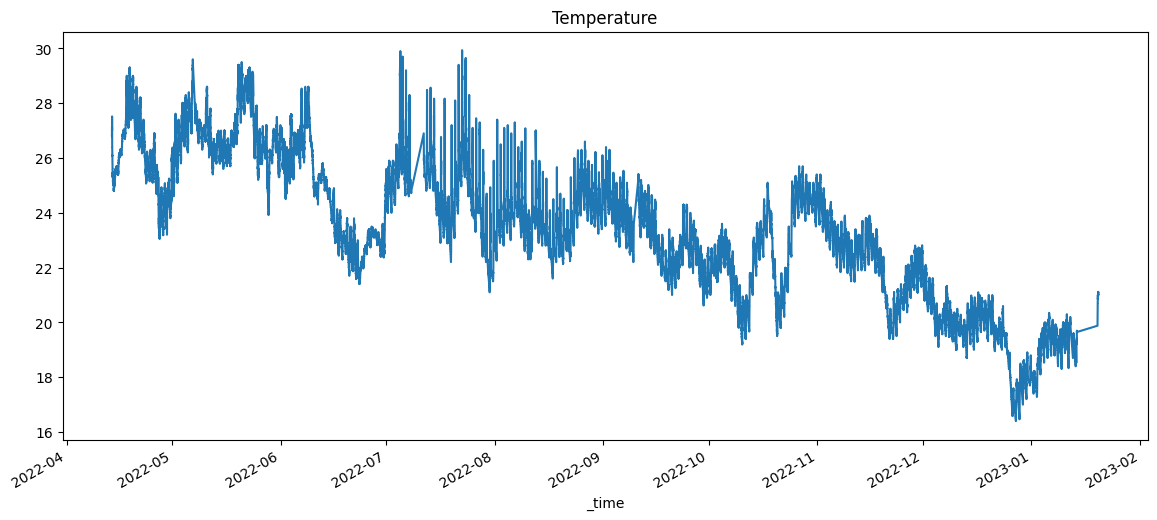

In [8]:
for column in data.columns:
    plt.figure(figsize=(14, 6))
    data[column].plot()
    plt.title(column)
    plt.show()

memperhalus plot

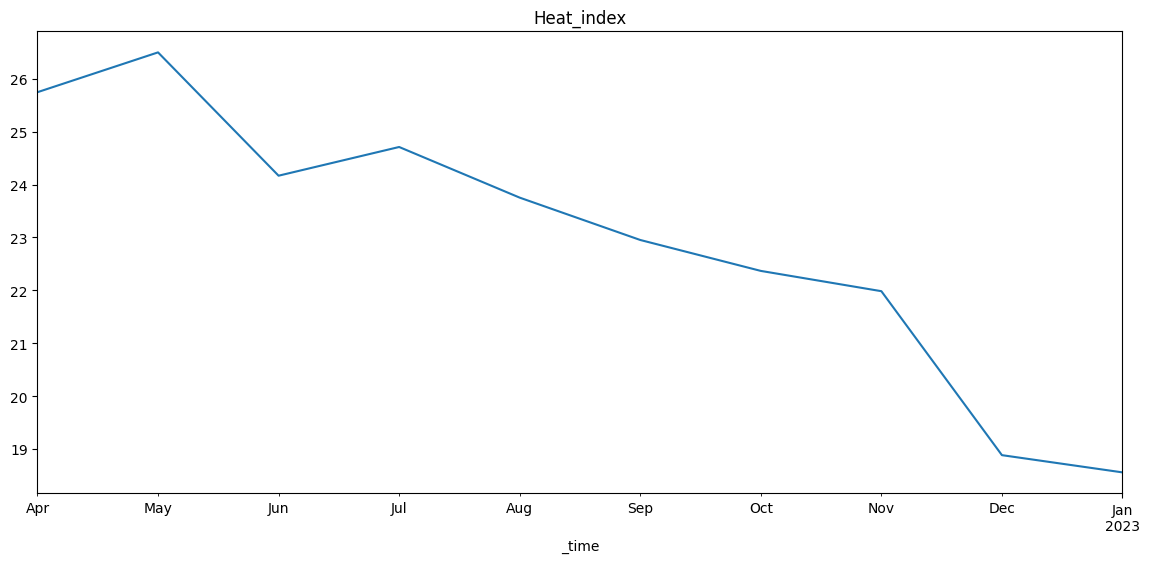

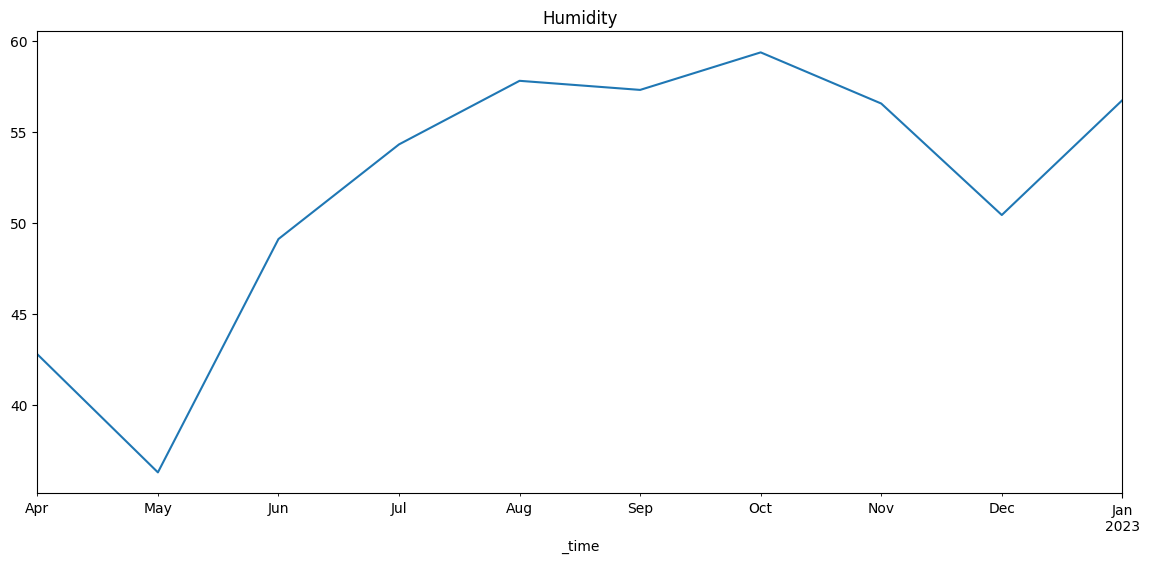

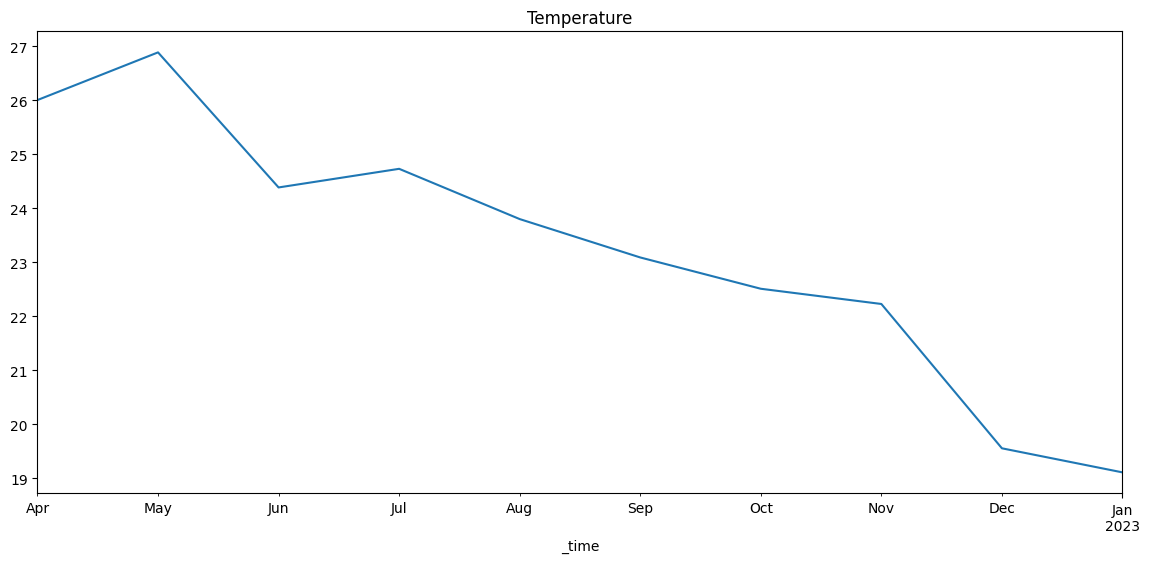

In [9]:
monthly_data = data.resample('M').mean()
for column in monthly_data.columns:
    plt.figure(figsize=(14, 6))
    monthly_data[column].plot()
    plt.title(column)
    plt.show()

membuat plot antar data untuk semua data

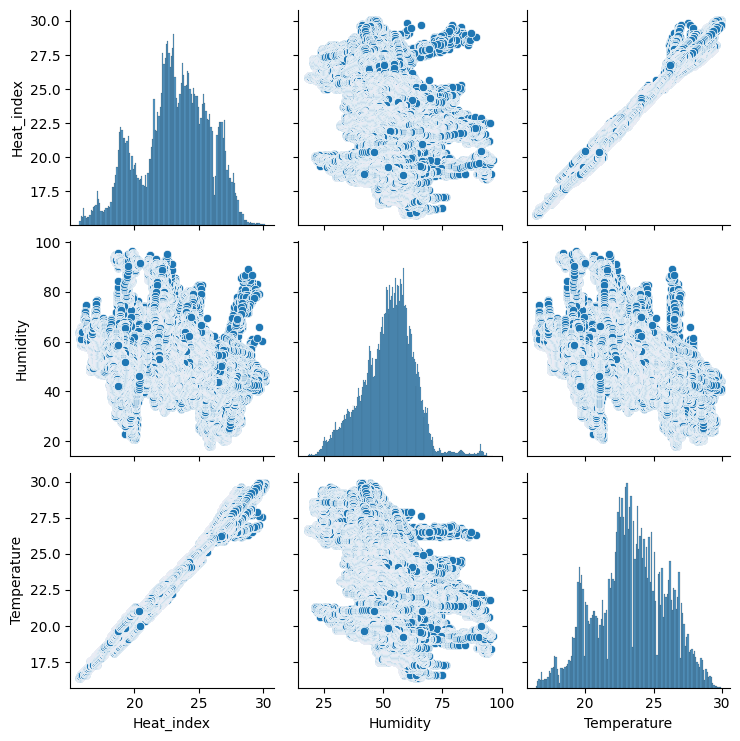

In [10]:
sns.pairplot(data)

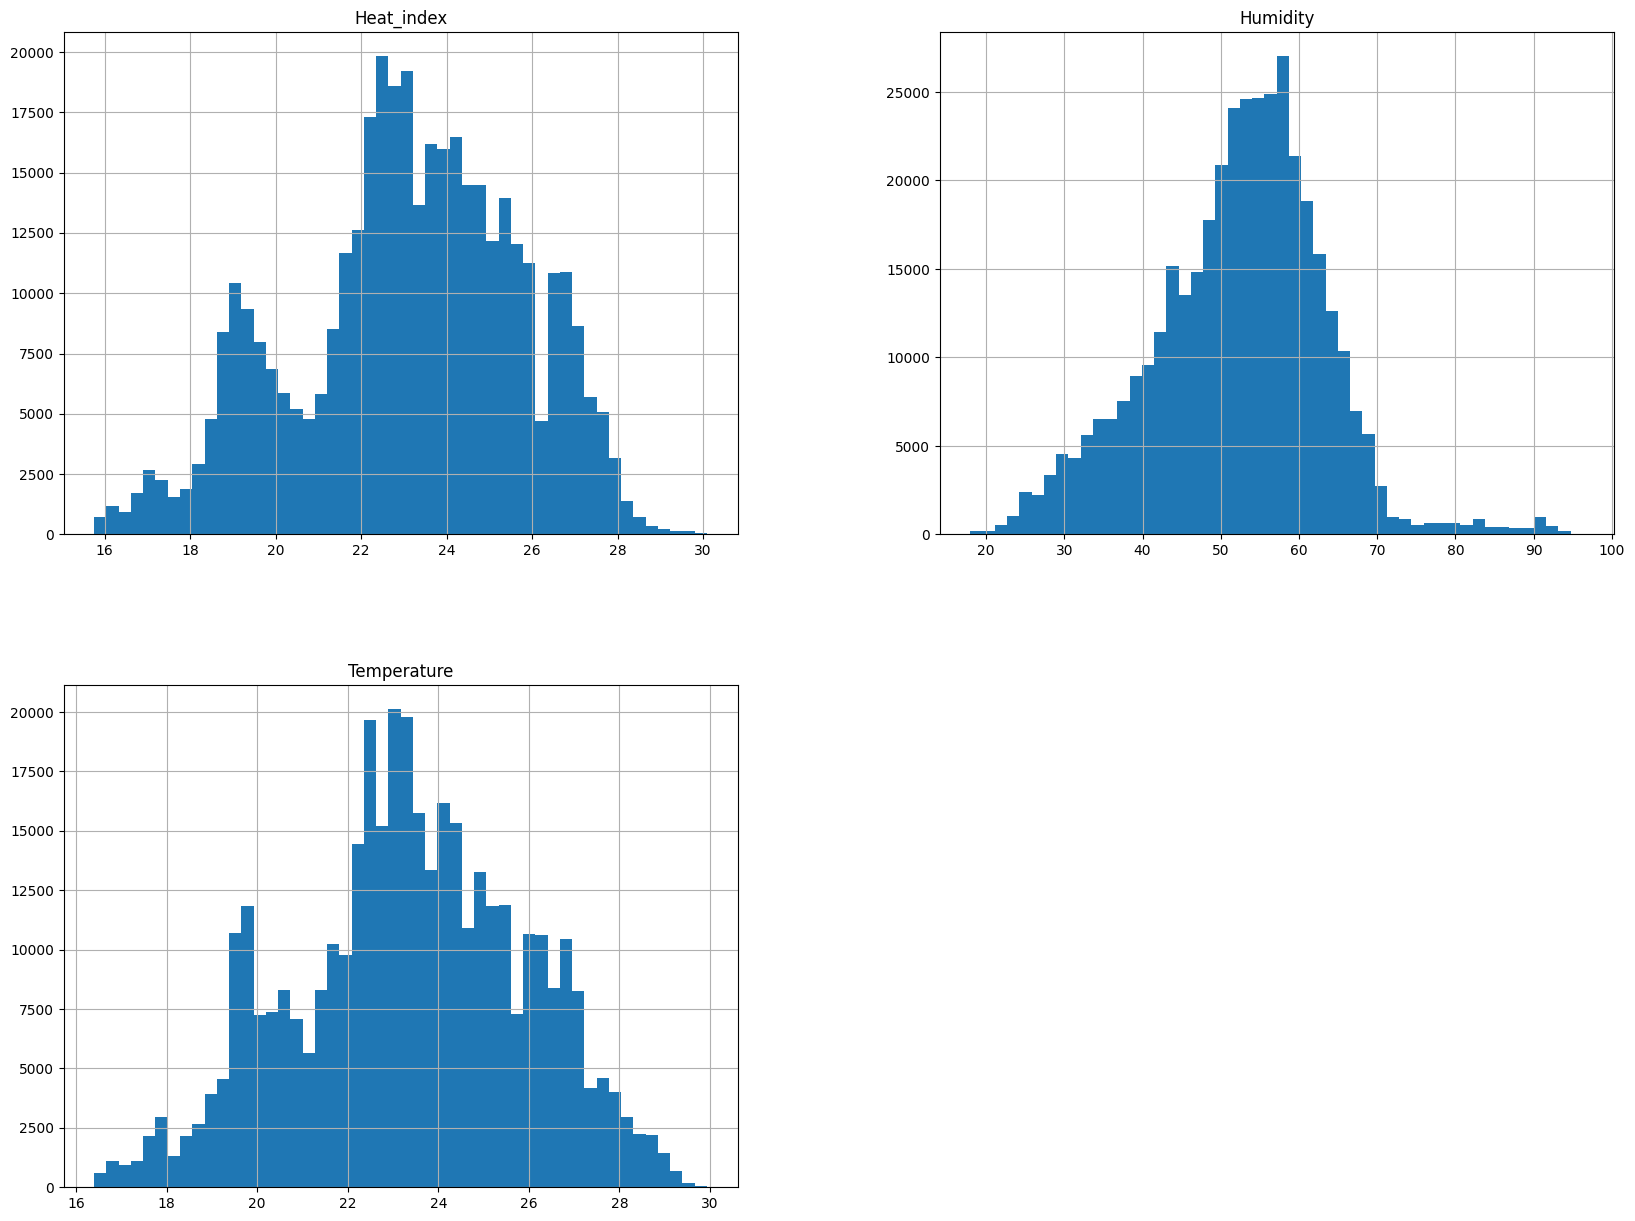

In [11]:
data.hist(bins=50,figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

membuat matrix kolerasi

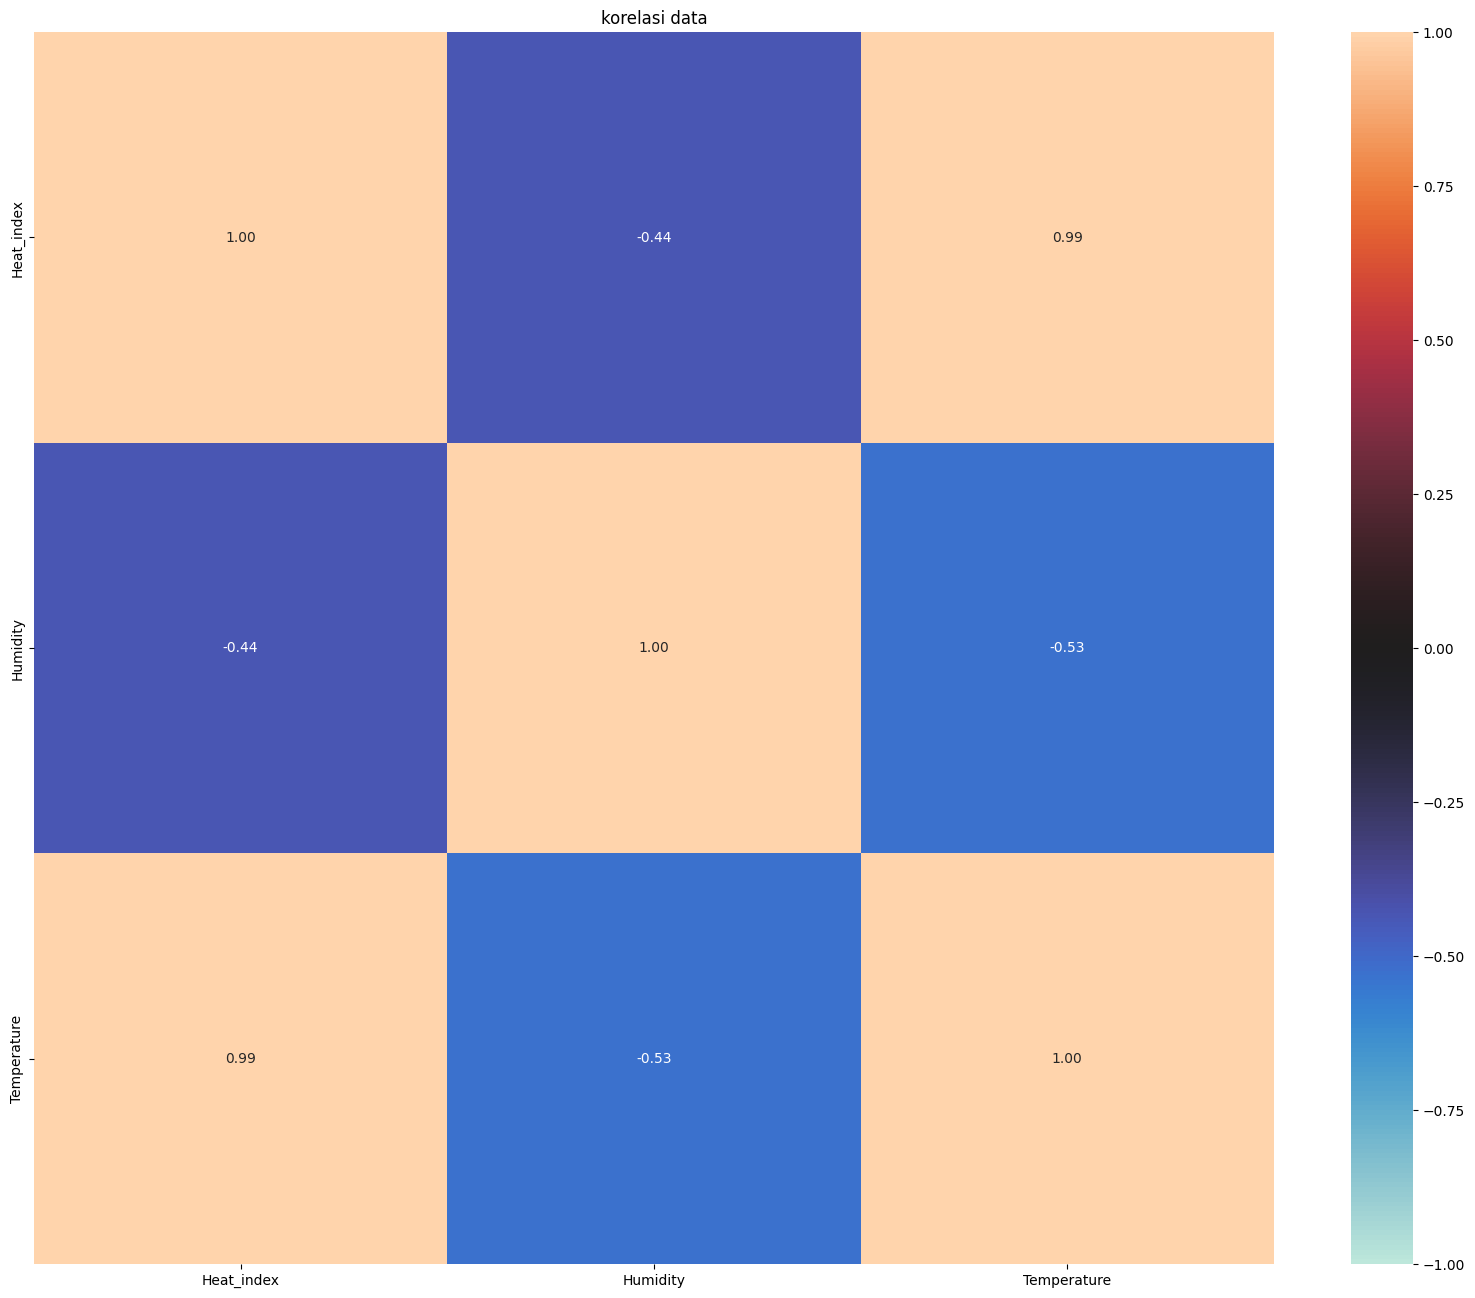

In [12]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
fig = plt.subplots(figsize=(20, 16))
sns.heatmap(data[data.columns[0:13].tolist()].corr(), annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0)
plt.title('korelasi data', fontsize=12)
plt.show()

## Split Data into test and train

membagi DataFrame data menjadi dua bagian: input (X) dan output (y)

In [13]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

## Data Scalling

menerapkan minmax scaler

In [14]:
scale = MinMaxScaler()
X = scale.fit_transform(X)
y = scale.fit_transform(y.values.reshape(-1, 1))

membagi data test dan data train (data test = 20 % dan data train = 80%)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

## LINEAR REGRESSION

In [16]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train score', lreg.score(X_train, y_train))
print('Test score', lreg.score(X_test, y_test))

Train score 0.997827613764311
Test score 0.9977907105621123


melakukan prediksi dari linear regression dan memperlihatkan hasilnya

In [17]:
y_pred = lreg.predict(X_test)
print (y_pred)

[[0.84080128]
 [0.58873245]
 [0.53532441]
 ...
 [0.09540154]
 [0.81123144]
 [0.39990402]]


## ANN Metode


In [18]:
ann = Sequential([Dense(32, activation="relu"),
                 Dense(1, activation='linear')])
ann.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mean_absolute_error'])
history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
7718/7718 [==============================] - 16s 2ms/step - loss: 9.3360e-04 - mean_absolute_error: 0.0080 - val_loss: 1.0225e-04 - val_mean_absolute_error: 0.0064
Epoch 2/50
7718/7718 [==============================] - 15s 2ms/step - loss: 5.8529e-05 - mean_absolute_error: 0.0042 - val_loss: 4.1435e-05 - val_mean_absolute_error: 0.0034
Epoch 3/50
7718/7718 [==============================] - 16s 2ms/step - loss: 4.1585e-05 - mean_absolute_error: 0.0038 - val_loss: 3.4483e-05 - val_mean_absolute_error: 0.0034
Epoch 4/50
7718/7718 [==============================] - 19s 2ms/step - loss: 2.7718e-05 - mean_absolute_error: 0.0031 - val_loss: 1.9909e-05 - val_mean_absolute_error: 0.0023
Epoch 5/50
7718/7718 [==============================] - 15s 2ms/step - loss: 1.8666e-05 - mean_absolute_error: 0.0025 - val_loss: 1.2161e-05 - val_mean_absolute_error: 0.0018
Epoch 6/50
7718/7718 [==============================] - 16s 2ms/step - loss: 1.1739e-05 - mean_absolute_error: 0.0021 - val_l

membuat plot tabel "loss" dan "acccuracy"

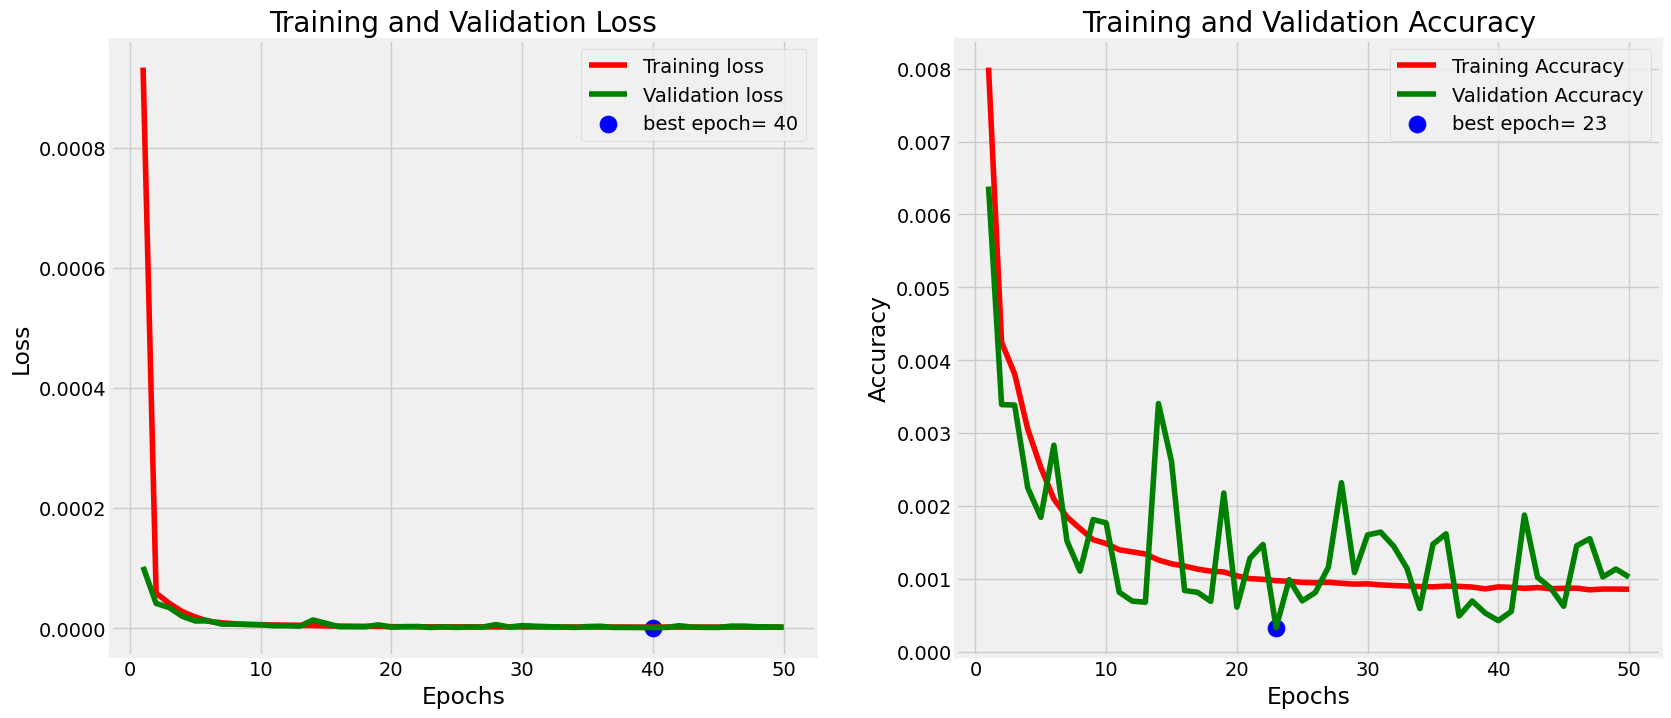

In [19]:
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

melakukan prediksi dari ANN dan memperlihatkan hasilnya



In [20]:
ann_y_pred = ann.predict(X_test)

print(ann_y_pred)

2412/2412 [==============================] - 3s 1ms/step
[[0.8589595 ]
 [0.5922548 ]
 [0.53796446]
 ...
 [0.09635587]
 [0.78516096]
 [0.39975676]]


mengevaluasi prediksi yang dilakukan

In [21]:
ann.evaluate(X_test, y_test)

2412/2412 [==============================] - 3s 1ms/step - loss: 1.8355e-06 - mean_absolute_error: 0.0010


[1.8355189013163908e-06, 0.0010202040430158377]

membuat plot perbandingan model

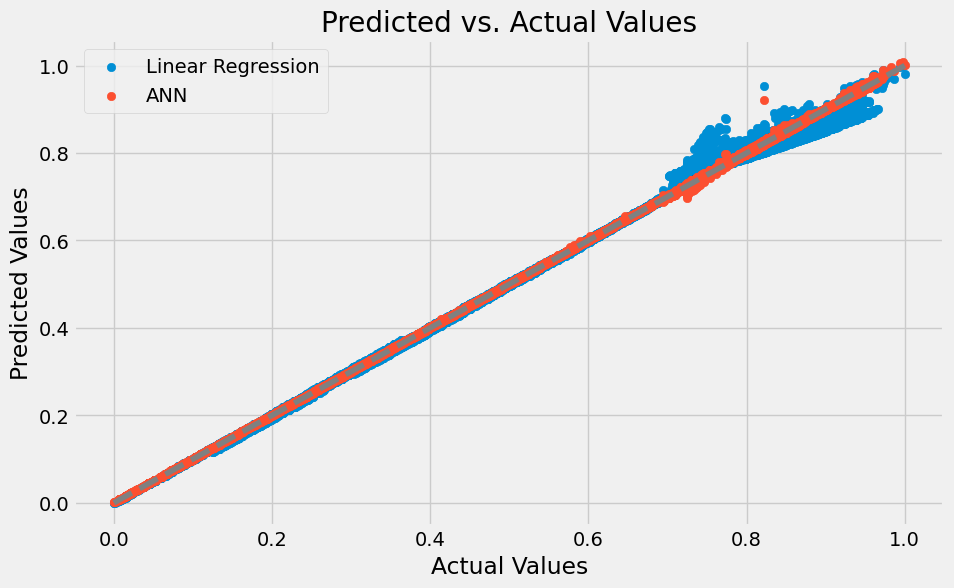

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Linear Regression')
plt.scatter(y_test, ann_y_pred, label='ANN')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

## Make Result Report

Membuat confusion matrix

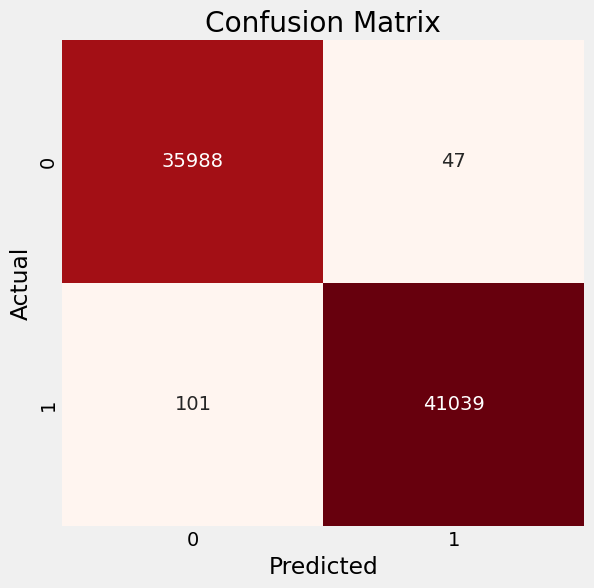

In [23]:
y_pred_binary = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test > 0.5, y_pred_binary)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


membuat classification report

In [24]:
print(classification_report(y_test > 0.5, y_pred_binary))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     36035
        True       1.00      1.00      1.00     41140

    accuracy                           1.00     77175
   macro avg       1.00      1.00      1.00     77175
weighted avg       1.00      1.00      1.00     77175



2412/2412 [==============================] - 4s 2ms/step
Akurasi Linear Regression: 99.78%
Akurasi ANN: 99.99%


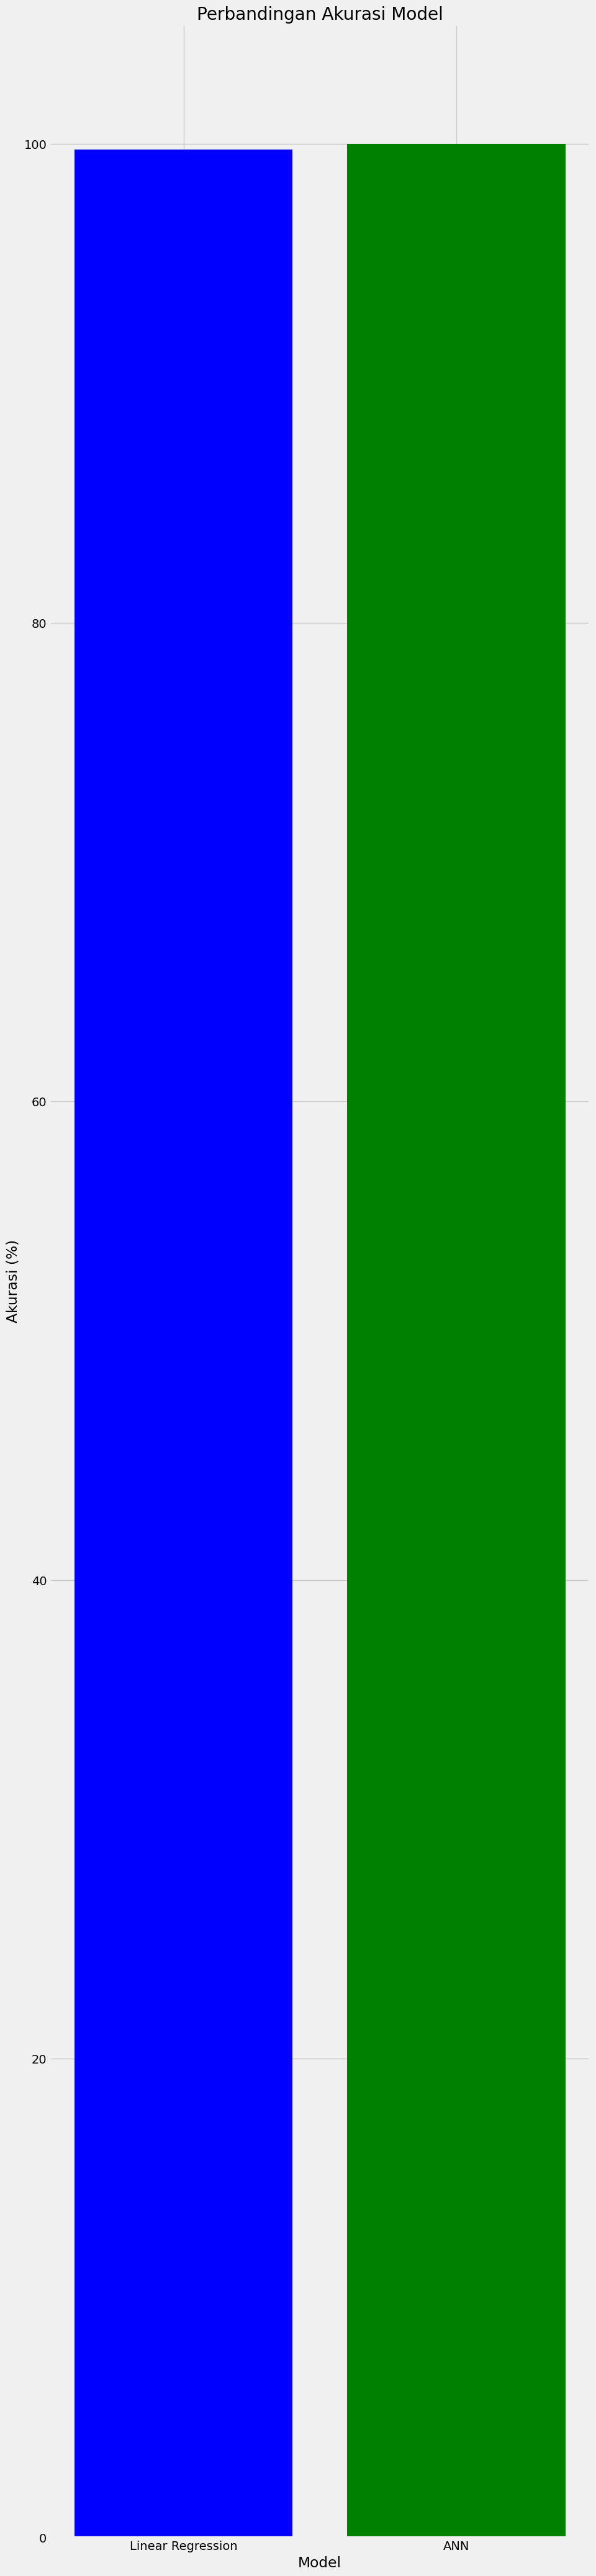

In [25]:
lr_predictions = lreg.predict(X_test)
ann_predictions = ann.predict(X_test)

lr_accuracy = r2_score(y_test, lr_predictions)
ann_accuracy = r2_score(y_test, ann_predictions)

lr_accuracy_percent = lr_accuracy * 100
ann_accuracy_percent = ann_accuracy * 100

print("Akurasi Linear Regression: {:.2f}%".format(lr_accuracy_percent))
print("Akurasi ANN: {:.2f}%".format(ann_accuracy_percent))

models = ['Linear Regression', 'ANN']
accuracy = [lr_accuracy_percent, ann_accuracy_percent]

plt.figure(figsize=(10, 50))
plt.bar(models, accuracy, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Akurasi (%)')
plt.title('Perbandingan Akurasi Model')
plt.show()


In [66]:
data = pd.read_csv('Sensors_data.csv')
data['_time'] = pd.to_datetime(data['_time'])


data.set_index('_time', inplace=True)
timestamp = timestamp_input = input("Masukkan timestamp (format: YYYY-MM-DDTHH:MM:SSZ): ")
data_at_timestamp = data.loc[timestamp]
print(data_at_timestamp)
high_temp_data = data[data['Temperature'] > 30]
print(high_temp_data)

Masukkan timestamp (format: YYYY-MM-DDTHH:MM:SSZ): 2023-01-20T01:13:00Z
Unnamed: 0     385868.00000
Heat_index         20.35908
Humidity           46.10000
Temperature        21.00000
Name: 2023-01-20 01:13:00+00:00, dtype: float64
Empty DataFrame
Columns: [Unnamed: 0, Heat_index, Humidity, Temperature]
Index: []
